<a href="https://colab.research.google.com/github/isa-dgc/DL/blob/main/Classification_cells_CNN_Git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting Environment

Importing Libraries and Google Drive.

In [ ]:
import tensorflow
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image, ImageEnhance
from PIL import Image, ImageOps
import os
import numpy as np

In [ ]:
#mounting the google drive for importing the data
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Here, you will retrieve your images (which I cannot share due to sensitive data) and unzip them or import them from a database such as Kaggle.

# !unzip /content/gdrive/MyDrive/....

Creating Directories for change separation and extracting the images.

In [ ]:
!mkdir White_Cells_Final
!mkdir White_Cells_Final/Train
!mkdir White_Cells_Final/Test
!mkdir White_Cells_Final/Train/EosiBaso
!mkdir White_Cells_Final/Train/Mono
!mkdir White_Cells_Final/Train/Neutro
!mkdir White_Cells_Final/Train/Linf
!mkdir White_Cells_Final/Test/EosiBaso
!mkdir White_Cells_Final/Test/Mono
!mkdir White_Cells_Final/Test/Neutro
!mkdir White_Cells_Final/Test/Linf

In [ ]:
# intiallizing the category of classification

# EosiBaso - Eosinophils and Basophils
# Linf - Lymphocytes
# Mono - Monocytes
# Neutro - Neutrophils

CATEGORIES=["EosiBaso","Linf","Mono","Neutro"]

# Equalizing the size of all processed images
Resizing all images to a specific size, as Neural Networks only recognize square images.

To achieve this, two codes were developed:

For images larger than the required size, the code reduces the image while maintaining its proportions, and the surrounding area is filled with similar pixel colors.

For images smaller than the required size, the code retains the exact image dimensions (avoiding distortion), and the surrounding area is also filled with similar pixel colors.



In [ ]:
def expand2square(pil_img, background_color):
    width, height = pil_img.size
    if width == height:
        return pil_img
    elif width > height:
        result = Image.new(pil_img.mode, (width, width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        return result
    else:
        result = Image.new(pil_img.mode, (height, height), background_color)
        result.paste(pil_img, ((height - width) // 2, 0))
        return result

In [ ]:
# Function to resize images (Train)

import numpy as np
import sys, os
import cv2
from PIL import Image, ImageOps
from matplotlib import pyplot as plt

tam = 85
R = 0

for i in CATEGORIES:
    R = R + 1
    path=os.path.join("/content/FolderwithimagestoberesizedTrain",i)
    for imagem in os.listdir(path):
      img_array=cv2.imread(os.path.join(path,imagem),cv2.IMREAD_GRAYSCALE)
      img = Image.open(os.path.join(path,imagem))
      width, height = img.size
      old_size = img.size

      if(width > tam) or (height > tam):
        im_new = expand2square(img, tuple(np.mean(np.array(img)[0,:], axis=0).astype(int))).resize((tam, tam), Image.LANCZOS)
        im_new.save('/content/White_Cells_Final/Train/'+ i  + '/' + str(R) + '_' + imagem, quality=95)

      else:
        ratio = float(tam)/max(old_size)

        new_size = tuple([int(x) for x in old_size])

        im = img.resize(new_size, Image.ANTIALIAS)

        new_im = Image.new("RGB", (tam, tam))
        new_im.paste(im, ((tam-new_size[0])//2,
                              (tam-new_size[1])//2))
        delta_w = tam - new_size[0]
        delta_h = tam - new_size[1]
        padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
        new_im = ImageOps.expand(im, padding, fill=tuple(np.mean(np.array(im)[0,:], axis=0).astype(int)))
        new_im.save('/content/White_Cells_Final/Train/'+ i + '/' + str(R) + '_' + imagem, quality=95)

In [ ]:
# Function to resize images (Test)

import numpy as np
import sys, os
import cv2
from PIL import Image, ImageOps
from matplotlib import pyplot as plt

tam = 85

for i in CATEGORIES:
    R = R + 1
    path=os.path.join("/content/FolderwithimagestoberesizedTest",i)
    for imagem in os.listdir(path):
      img_array=cv2.imread(os.path.join(path,imagem),cv2.IMREAD_GRAYSCALE)
      img = Image.open(os.path.join(path,imagem))
      width, height = img.size
      old_size = img.size

      if(width > tam) or (height > tam):
        im_new = expand2square(img, tuple(np.mean(np.array(img)[0,:], axis=0).astype(int))).resize((tam, tam), Image.LANCZOS)
        im_new.save('/content/White_Cells_Final/Test/'+ i  + '/' + str(R) + '_' + imagem, quality=95)

      else:
        ratio = float(tam)/max(old_size)

        new_size = tuple([int(x) for x in old_size])

        im = img.resize(new_size, Image.ANTIALIAS)

        new_im = Image.new("RGB", (tam, tam))
        new_im.paste(im, ((tam-new_size[0])//2,
                              (tam-new_size[1])//2))
        delta_w = tam - new_size[0]
        delta_h = tam - new_size[1]
        padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
        new_im = ImageOps.expand(im, padding, fill=tuple(np.mean(np.array(im)[0,:], axis=0).astype(int)))
        new_im.save('/content/White_Cells_Final/Test/'+ i + '/' + str(R) + '_' + imagem, quality=95)

# Creating the vectors to enter the CNN.
Converting images into vectors and modifications to serve in the Neural Network.

In [ ]:
training_data=[]

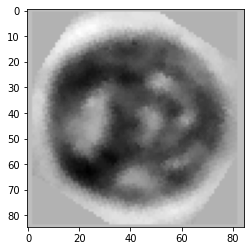

In [ ]:
# Converting the images into grayscale - Showing
for i in CATEGORIES:
    path=os.path.join(r"/content/White_Cells_Final/Train",i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

In [ ]:
# Function to convert the images into grayscale for training images
def create_training_data():
    for i in CATEGORIES:

        path=os.path.join(r"/content/White_Cells_Final/Train",i)
        class_num=CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                training_data.append([img_array,class_num])

            except Exception as e:
                pass

In [ ]:
create_training_data()

In [ ]:
# Total number of training images
print(len(training_data))

71010


In [ ]:
# Shuffling the images to avoid them being in order, preventing the model from learning a class better simply because it started with that order.
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample)

[array([[91, 91, 91, ..., 91, 91, 91],
       [91, 91, 91, ..., 91, 91, 91],
       [91, 91, 91, ..., 91, 91, 91],
       ...,
       [91, 91, 91, ..., 91, 91, 91],
       [91, 91, 91, ..., 91, 91, 91],
       [91, 91, 91, ..., 91, 91, 91]], dtype=uint8), 1]
[array([[109, 109, 109, ..., 109, 109, 109],
       [109, 109, 109, ..., 109, 109, 109],
       [109, 109, 109, ..., 109, 109, 109],
       ...,
       [109, 109, 109, ..., 109, 109, 109],
       [109, 109, 109, ..., 109, 109, 109],
       [109, 109, 109, ..., 109, 109, 109]], dtype=uint8), 3]
[array([[103, 103, 103, ..., 103, 103, 103],
       [103, 103, 103, ..., 103, 103, 103],
       [103, 103, 103, ..., 103, 103, 103],
       ...,
       [103, 103, 103, ..., 103, 103, 103],
       [103, 103, 103, ..., 103, 103, 103],
       [103, 103, 103, ..., 103, 103, 103]], dtype=uint8), 1]
[array([[114, 114, 114, ..., 114, 114, 114],
       [114, 114, 114, ..., 114, 114, 114],
       [114, 114, 114, ..., 114, 114, 114],
       ...,
      

In [ ]:
x_train=[]
y_train=[]

In [ ]:
# spliting the features and labels
for features,label in training_data:
    x_train.append(features)
    y_train.append(label)

In [ ]:
y_train = np.array(y_train)

In [ ]:
# reshapping the features for making it compatible with tensorflow
x_train=np.array(x_train).reshape(-1,tam,tam,1)

In [ ]:
#as we do for training data similiarly doing with validation data
validation_data=[]
DataDir_val= r"/content/White_Cells_Final/Test"

In [ ]:
# Function to convert the images into grayscale for testing images
def create_validating_data():
    for i in CATEGORIES:

        path=os.path.join(r"/content/White_Cells_Final/Test",i)
        class_num=CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                validation_data.append([img_array,class_num])

            except Exception as e:
                pass

In [ ]:
# Total number of testing images
create_validating_data()
print(len(validation_data))

35505


In [ ]:
# Shuffling the images to avoid them being in order, preventing the model from learning a class better simply because it started with that order.
import random
random.shuffle(validation_data)
for sample in validation_data[:10]:
    print(sample)

[array([[129, 129, 129, ..., 129, 129, 129],
       [129, 129, 129, ..., 129, 129, 129],
       [129, 129, 129, ..., 129, 129, 129],
       ...,
       [129, 129, 129, ..., 129, 129, 129],
       [129, 129, 129, ..., 129, 129, 129],
       [129, 129, 129, ..., 129, 129, 129]], dtype=uint8), 3]
[array([[113, 113, 113, ..., 113, 113, 113],
       [113, 113, 113, ..., 113, 113, 113],
       [113, 113, 113, ..., 113, 113, 113],
       ...,
       [113, 113, 113, ..., 113, 113, 113],
       [113, 113, 113, ..., 113, 113, 113],
       [113, 113, 113, ..., 113, 113, 113]], dtype=uint8), 2]
[array([[89, 89, 89, ..., 89, 89, 89],
       [89, 89, 89, ..., 89, 89, 89],
       [89, 89, 89, ..., 89, 89, 89],
       ...,
       [89, 89, 89, ..., 89, 89, 89],
       [89, 89, 89, ..., 89, 89, 89],
       [89, 89, 89, ..., 89, 89, 89]], dtype=uint8), 3]
[array([[189, 189, 189, ..., 189, 189, 189],
       [189, 189, 189, ..., 189, 189, 189],
       [189, 189, 189, ..., 189, 189, 189],
       ...,
      

In [ ]:
x_val=[]
y_val=[]

In [ ]:
for features,label in validation_data:
    x_val.append(features)
    y_val.append(label)

In [ ]:
y_val = np.array(y_val)
x_val=np.array(x_val).reshape(-1,tam,tam,1)

In [ ]:
# importing the library for training the model and adding the neural network layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
import pickle

In [ ]:
from keras.layers import Conv2D,MaxPooling2D

In [ ]:
# Pixels value ranges from 0 to 255, 0 means black, 255 means white
# In order to scale it down to a scale of 0 to 1, we are performing this step
x_train=x_train/255.0
x_val=x_val/255.0

In [ ]:
x_train.shape

(71010, 85, 85, 1)

In [ ]:
x_val.shape

(35505, 85, 85, 1)

# Classification Neural Network
Deciding on the CNN model to be used, compiling, and running it. Additionally, displaying the summary and saving the model.

In [ ]:
# Initializing the neural network layer for training the model
model= Sequential()

model.add(Conv2D(64,(3,3),input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(.5))
model.add(Dense(4))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# fitting (training) the model with 10 epochs and using the validation data we have created
hist = model.fit(x_train,y_train,batch_size=10,epochs=10,validation_data=(x_val, y_val))

Epoch 1/10
7101/7101 [==============================] - 2804s 395ms/step - loss: 0.5459 - accuracy: 0.7601 - val_loss: 0.3586 - val_accuracy: 0.8501
Epoch 2/10
7101/7101 [==============================] - 2788s 393ms/step - loss: 0.3699 - accuracy: 0.8477 - val_loss: 0.3462 - val_accuracy: 0.8439
Epoch 3/10
7101/7101 [==============================] - 2784s 392ms/step - loss: 0.3069 - accuracy: 0.8745 - val_loss: 0.2284 - val_accuracy: 0.9045
Epoch 4/10
7101/7101 [==============================] - 2772s 390ms/step - loss: 0.2679 - accuracy: 0.8915 - val_loss: 0.2659 - val_accuracy: 0.8897
Epoch 5/10
7101/7101 [==============================] - 2826s 398ms/step - loss: 0.2448 - accuracy: 0.9026 - val_loss: 0.2061 - val_accuracy: 0.9140
Epoch 6/10
7101/7101 [==============================] - 2832s 399ms/step - loss: 0.2161 - accuracy: 0.9149 - val_loss: 0.1967 - val_accuracy: 0.9138
Epoch 7/10
7101/7101 [==============================] - 2773s 390ms/step - loss: 0.2007 - accuracy: 0.9218

In [ ]:
#summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 83, 83, 64)        640       
                                                                 
 activation (Activation)     (None, 83, 83, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 41, 41, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 41, 41, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 39, 39, 128)       73856     
                                                                 
 activation_1 (Activation)   (None, 39, 39, 128)       0         
                                                        

In [ ]:
# saving the model
model.save(r"model_10.h5")

# Testing the model

Observing the metric values through graphs.

In [ ]:
# importing the library for testing the model
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model

In [ ]:
import pandas as pd
pd.DataFrame(hist.history)

,loss,accuracy,val_loss,val_accuracy
0,0.545923,0.760132,0.358583,0.850106
1,0.369948,0.847740,0.346194,0.843937
2,0.306860,0.874539,0.228399,0.904492
3,0.267905,0.891508,0.265900,0.889706
4,0.244770,0.902563,0.206124,0.913984
5,0.216087,0.914942,0.196717,0.913759
6,0.200745,0.921786,0.176569,0.929841
7,0.190556,0.926334,0.209723,0.915111
8,0.178795,0.930770,0.125409,0.947303
9,0.172502,0.933911,0.151290,0.943557


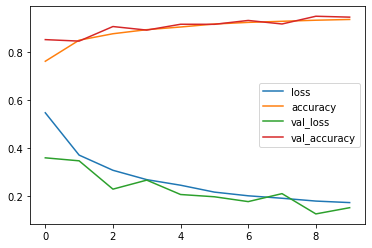

In [ ]:
pd.DataFrame(hist.history).plot()

Test loss: 0.15129053592681885
Test accuracy: 0.9435572624206543


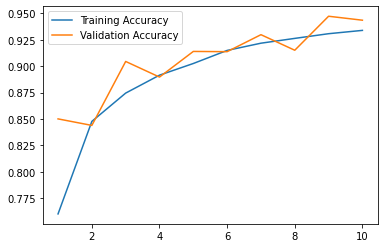

In [ ]:
#   Evaluate the model with the test data to get the scores on "real" data.
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#   Plot data to see relationships in training and validation data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
epoch_list = list(range(1, len(hist.history['accuracy']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

Choosing a random image to observe the prediction values. Then, after that, selecting 5 random images.

In [ ]:
CATEGORIES=["EosiBaso","Linf","Mono","Neutro"]

In [ ]:
# function for preparing the image for predicting the class
def prepare(image):
    img_size=85
    img=tf.keras.preprocessing.image.load_img(image, color_mode='grayscale', target_size=(img_size,img_size))
    new_array=tf.keras.preprocessing.image.img_to_array(img)

    return new_array.reshape(-1,img_size,img_size,1)

In [ ]:
# Loading the previously saved model.
model_01 = tf.keras.models.load_model(r"model_10.h5")
# image=r'/content/White_Cells_Final/Test/EosiBaso/33_105_RT_OR_0_HR+CR_P13_I1.png'
image = r'/content/White_Cells_Final/Test/???'

1/1 [==============================] - 0s 294ms/step
[[1.0000000e+00 1.4182872e-21 1.2815689e-15 9.8703570e-14]]


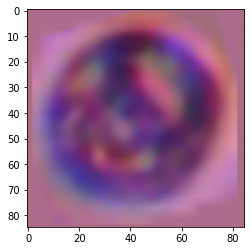

In [ ]:
# Making the prediction of which class the image belongs to using this order:
# EosiBaso, Linf, Mono, Neutro

prediction=model.predict([prepare(image)/255.0])
print(prediction)
img=mpimg.imread(image)
imgplot=plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 92ms/step


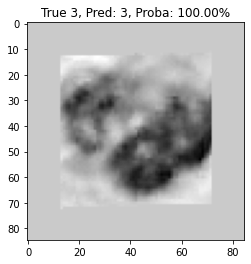

1/1 [==============================] - 0s 31ms/step


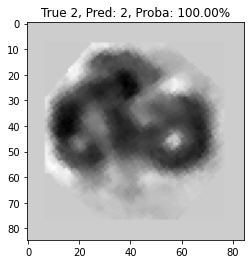

1/1 [==============================] - 0s 28ms/step


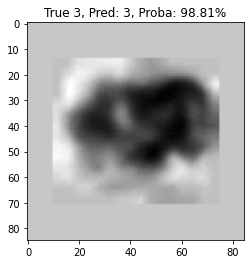

1/1 [==============================] - 0s 28ms/step


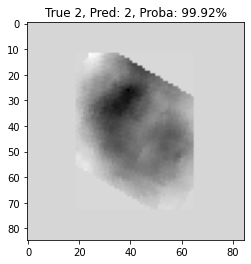

1/1 [==============================] - 0s 27ms/step


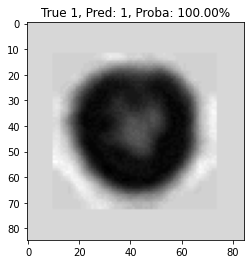

In [ ]:
# With 5 random images
for idx in range(5):
    x=x_val[idx].reshape(1, 85, 85, 1)
    plt.imshow(x.reshape(85, 85), cmap='gray')
    pred = model.predict(x)
    pred_class = pred.argmax()
    plt.title(f'True {y_val[idx]}, Pred: {pred_class}, Proba: {pred[0][pred_class]*100:.2f}%')
    plt.show()

Displaying the results of the Confusion Matrix and the chosen metrics (accuracy, precision, sensitivity (recall), specificity, and F1-Score).

In [ ]:
# Importing needed libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import h5py
import cv2


from keras.models import load_model

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from timeit import default_timer as timer

In [ ]:
# Testing
accuracy_best = 0

print('x_test shape      :', x_val.shape)
print('y_test shape      :', y_val.shape)
temp = model.predict(x_val)
print('prediction shape  :', temp.shape)
print('prediction scores :', temp[0])
temp = np.argmax(temp, axis=1)

print('prediction shape  :', temp.shape)
print('predicted indexes :', temp[0:10])
print('correct indexes   :', y_val[:10])

accuracy = np.mean(temp == y_val)

print('T and F matrix    :', (temp == y_val)[0:10])
print('Testing accuracy  : {0:.5f}'.format(accuracy))
print()

if accuracy > accuracy_best:
        # Updating value of the best accuracy
    accuracy_best = accuracy

        # Saving predicted indexes of the best model into array
        # Updating array with predicted indexes of the best model
    y_predicted_best = temp


x_test shape      : (35505, 85, 85, 1)
y_test shape      : (35505,)
1110/1110 [==============================] - 305s 275ms/step
prediction shape  : (35505, 4)
prediction scores : [9.5690160e-21 3.2499863e-13 1.7026763e-12 9.9999994e-01]
prediction shape  : (35505,)
predicted indexes : [3 2 3 2 1 0 0 3 1 2]
correct indexes   : [3 2 3 2 1 0 0 3 1 3]
T and F matrix    : [ True  True  True  True  True  True  True  True  True False]
Testing accuracy  : 0.94356



In [ ]:
# Showing the main classification metrics of the best model
print(classification_report(y_val, y_predicted_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8640
           1       0.94      0.98      0.96      8910
           2       0.87      0.98      0.93      9180
           3       0.98      0.81      0.89      8775

    accuracy                           0.94     35505
   macro avg       0.95      0.94      0.94     35505
weighted avg       0.95      0.94      0.94     35505



In [ ]:
# Confusion matrix is a two dimensional matrix that visualizes the performance,
# and makes it easy to see confusion between classes,
# by providing a picture of interrelation

# Each row represents a number of actual class
# Each column represents a number of predicted class
# Computing confusion matrix to evaluate accuracy of classification

c_m = confusion_matrix(y_val, y_predicted_best)

# Showing confusion matrix in form of Numpy array
print(c_m)

[[8640    0    0    0]
 [   0 8742  121   47]
 [   0   69 9041   70]
 [   1  521 1175 7078]]


In [ ]:
# Preparing labels for custom dataset
labels_custom = ['EosiBaso', 'Linf', 'Mono', 'Neutro']
print(labels_custom)

['EosiBaso', 'Linf', 'Mono', 'Neutro']


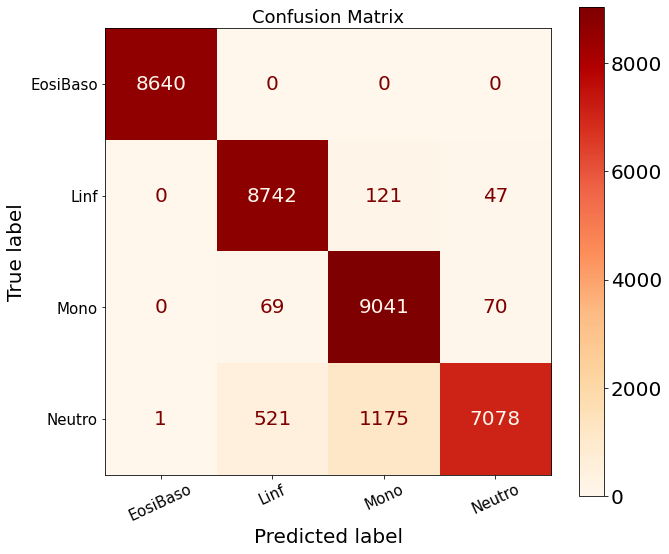

In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 20

display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels_custom)

display_c_m.plot(cmap='OrRd', xticks_rotation=25)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.title('Confusion Matrix', fontsize=18)

plt.savefig('Matrix.png', transparent=True, dpi=500)

plt.show()

In [ ]:
# Defining function to plot bar chart with scores values
def bar_chart(scores, bar_title, show_xticks=True, labels=None):
    # Arranging X axis
    x_positions = np.arange(scores.size)

    # Creating bar chart
    barlist = plt.bar(x_positions, scores, align='center', alpha=0.6)

    # Highlighting the highest bar
    barlist[np.argmax(scores)].set_color('red')

    # Giving labels to bars along X axis
    if show_xticks:
        plt.xticks(x_positions, labels, rotation=20, fontsize=15)

    # Giving name to axes
    plt.xlabel('Class', fontsize=20)
    plt.ylabel('Value', fontsize=20)

    # Giving name to bar chart
    plt.title('Classification of ' + bar_title, fontsize=20)

    # Showing bar chart
    plt.show()


# Check point
print('Function to plot Bar Chart is successfully defined')


Function to plot Bar Chart is successfully defined


1/1 [==============================] - 0s 35ms/step

Scores shape        : (1, 4)
Scores values       : [1.0000000e+00 1.4182872e-21 1.2815689e-15 9.8703570e-14]
Scores sum          : 1.0
Score of prediction : 1.00000
Class index         : 0
Label               : EosiBaso
Time                : 0.07049


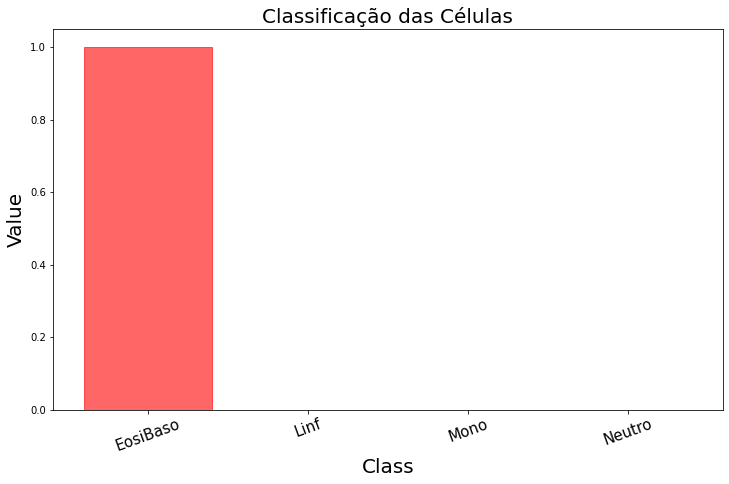

In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12, 7)

# Testing RGB model trained on dataset: dataset_custom_rgb_255_mean.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
# scores = model.predict(image_custom_rgb_255_mean)
# scores = model.predict(x_val)
scores = model.predict(prepare(image)/255.0) # imagem normalizada
end = timer()

# Scores are given as 5 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction])) # REVER
print('Class index         :', prediction)
print('Label               :', labels_custom[prediction]) # REVER
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='Cells',
          show_xticks=True,
          labels=labels_custom)

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

from sklearn import metrics
Accuracy = metrics.accuracy_score(y_val, y_predicted_best)
Precision = metrics.precision_score(y_val, y_predicted_best, average='weighted') # micro, macro ou weighted
Sensitivity_recall = metrics.recall_score(y_val, y_predicted_best, average='weighted')
Specificity = metrics.recall_score(y_val, y_predicted_best, average='weighted')
F1_score = metrics.f1_score(y_val, y_predicted_best, average='weighted')

In [ ]:
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.9435572454583862, 'Precision': 0.9476706445460931, 'Sensitivity_recall': 0.9435572454583862, 'Specificity': 0.9435572454583862, 'F1_score': 0.9424747973896846}


In [ ]:
print("Accuracy: ",Accuracy)
print("Precision: ",Precision)
print("Sensitivity_recall: ",Sensitivity_recall)
print("Specificity: ",Specificity)
print("F1_score: ",F1_score)

Accuracy:  0.9435572454583862
Precision:  0.9476706445460931
Sensitivity_recall:  0.9435572454583862
Specificity:  0.9435572454583862
F1_score:  0.9424747973896846


Test - Image with and without SR (Super Resolution) - 4 different cells.


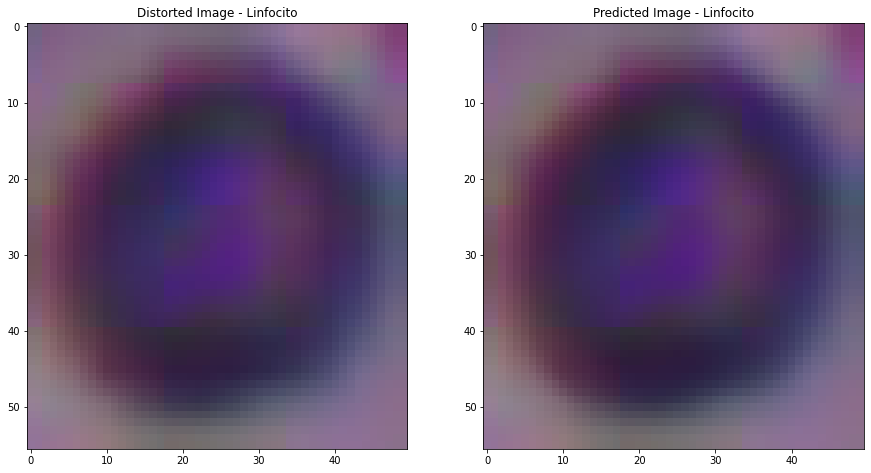

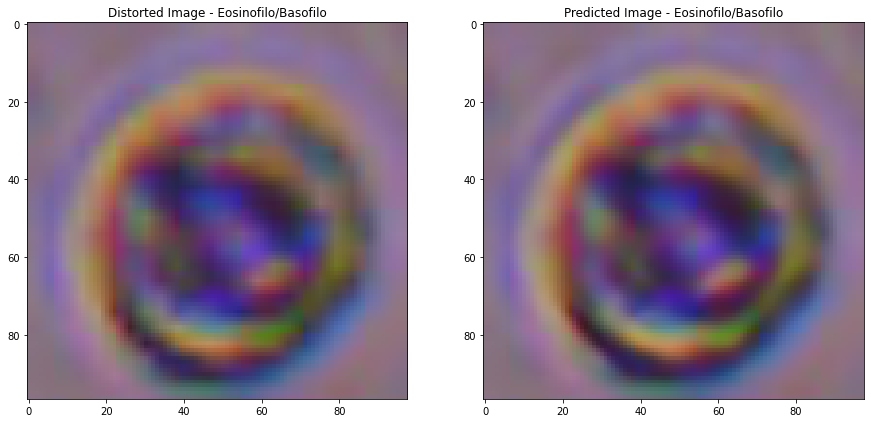

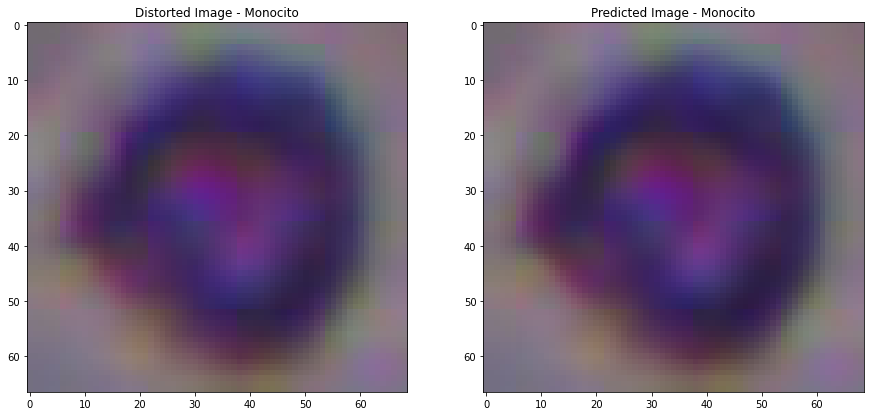

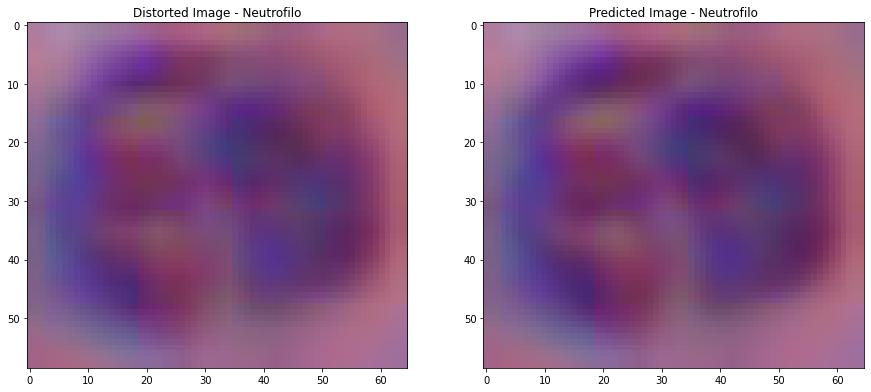

In [ ]:
# Plotting the distorted image and the predicted one simultaneously for comparison.

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(Image.open(r'/content/input_L.png'))
ax[0].title.set_text("Distorted Image - Linfocito")

ax[1].imshow(Image.open(r'/content/output_L.png'))
ax[1].title.set_text("Predicted Image - Linfocito")


fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(Image.open(r'/content/input_EB.png'))
ax[0].title.set_text("Distorted Image - Eosinofilo/Basofilo")

ax[1].imshow(Image.open(r'/content/output_EB.png'))
ax[1].title.set_text("Predicted Image - Eosinofilo/Basofilo")


fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(Image.open(r'/content/input_M.png'))
ax[0].title.set_text("Distorted Image - Monocito")

ax[1].imshow(Image.open(r'/content/output_M.png'))
ax[1].title.set_text("Predicted Image - Monocito")


fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(Image.open(r'/content/input_N.png'))
ax[0].title.set_text("Distorted Image - Neutrofilo")

ax[1].imshow(Image.open(r'/content/output_N.png'))
ax[1].title.set_text("Predicted Image - Neutrofilo")

In [ ]:
image=[r'/content/input_L.png',
       r'/content/output_L.png',
       r'/content/input_EB.png',
       r'/content/output_EB.png',
       r'/content/input_M.png',
       r'/content/output_M.png',
       r'/content/input_N.png',
       r'/content/output_N.png']

1/1 [==============================] - 0s 27ms/step

Scores shape        : (1, 4)
Scores values       : [0.98826337 0.00555731 0.00358063 0.00259866]
Scores sum          : 0.99999994
Score of prediction : 0.98826
Class index         : 0
Label               : EosiBaso
Time                : 0.06289


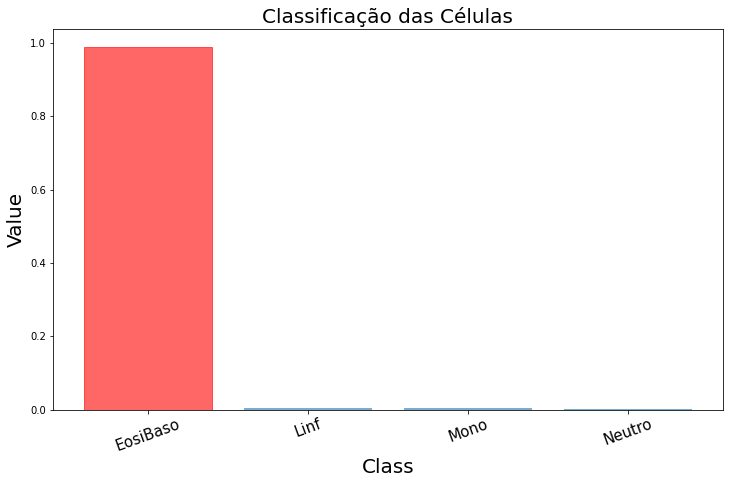

1/1 [==============================] - 0s 28ms/step

Scores shape        : (1, 4)
Scores values       : [9.9667490e-01 6.9236738e-04 1.1387231e-03 1.4940337e-03]
Scores sum          : 1.0
Score of prediction : 0.99667
Class index         : 0
Label               : EosiBaso
Time                : 0.06645


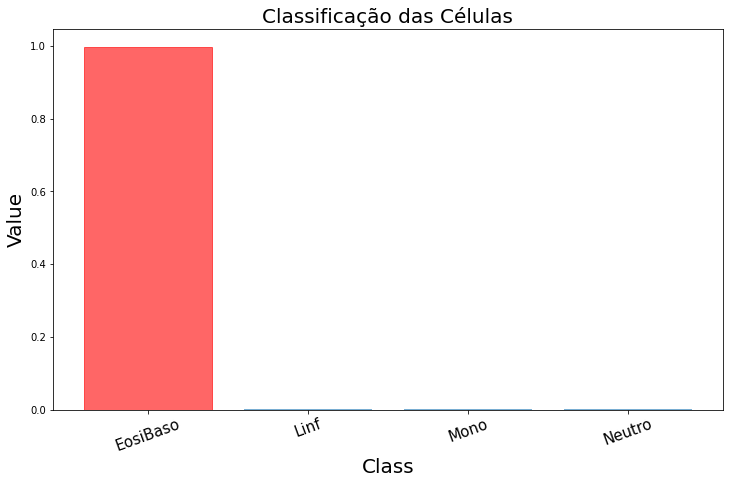

1/1 [==============================] - 0s 27ms/step

Scores shape        : (1, 4)
Scores values       : [9.9999678e-01 7.1541124e-13 5.4291896e-12 3.2529927e-06]
Scores sum          : 1.0
Score of prediction : 1.00000
Class index         : 0
Label               : EosiBaso
Time                : 0.06862


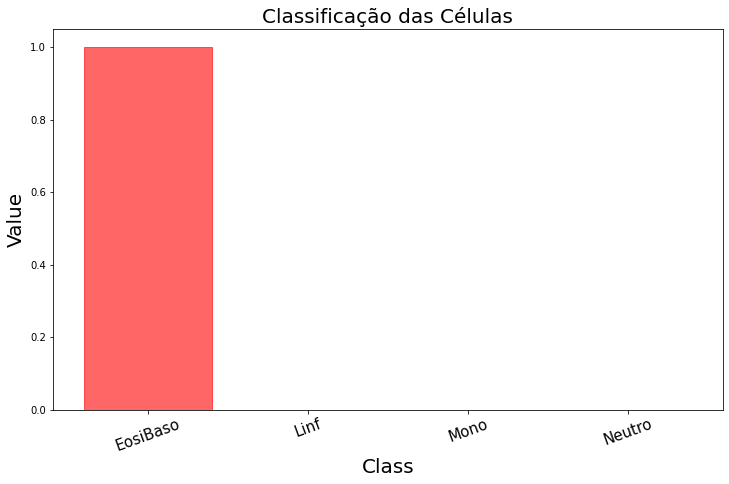

1/1 [==============================] - 0s 28ms/step

Scores shape        : (1, 4)
Scores values       : [1.0000000e+00 4.9515878e-23 1.8193771e-25 1.5473508e-19]
Scores sum          : 1.0
Score of prediction : 1.00000
Class index         : 0
Label               : EosiBaso
Time                : 0.06513


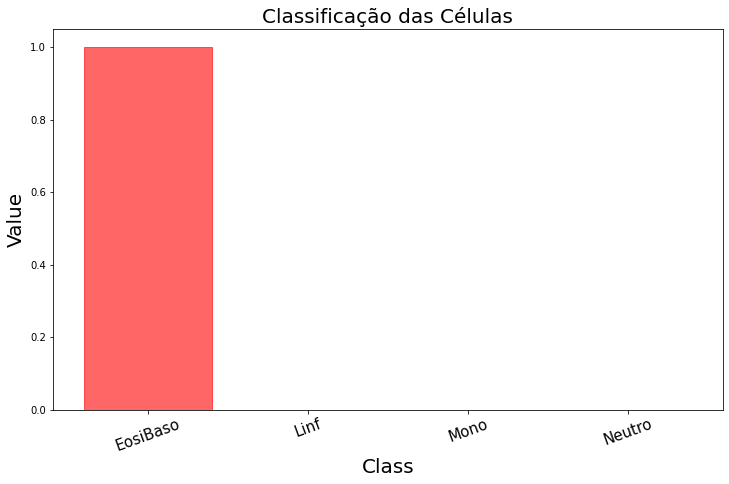

1/1 [==============================] - 0s 28ms/step

Scores shape        : (1, 4)
Scores values       : [1.9018793e-06 7.7843651e-02 8.8292998e-01 3.9224524e-02]
Scores sum          : 1.0000001
Score of prediction : 0.88293
Class index         : 2
Label               : Mono
Time                : 0.07214


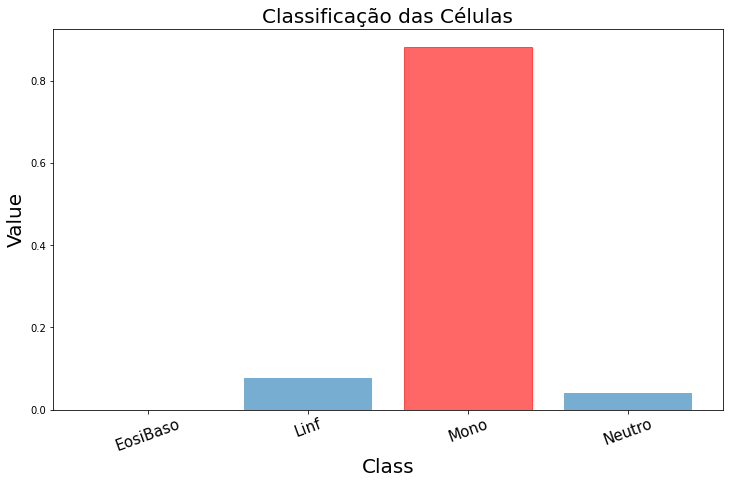

1/1 [==============================] - 0s 30ms/step

Scores shape        : (1, 4)
Scores values       : [5.2031078e-06 3.0209164e-03 9.3180346e-01 6.5170392e-02]
Scores sum          : 1.0
Score of prediction : 0.93180
Class index         : 2
Label               : Mono
Time                : 0.06654


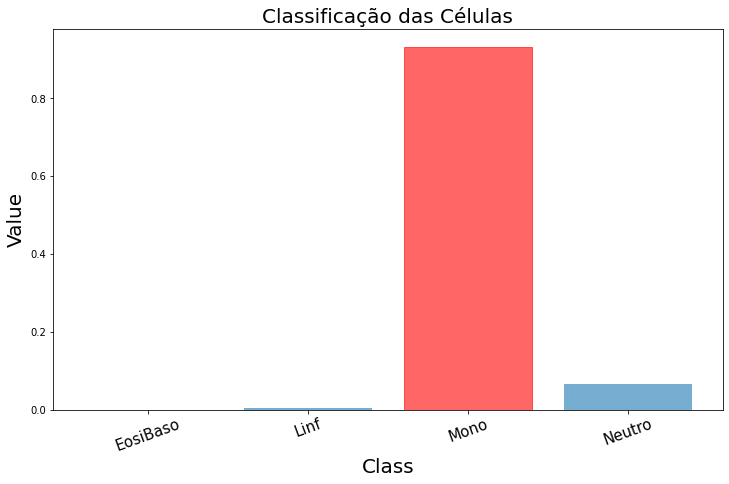

1/1 [==============================] - 0s 40ms/step

Scores shape        : (1, 4)
Scores values       : [0.00339413 0.00724055 0.5147327  0.47463265]
Scores sum          : 1.0
Score of prediction : 0.51473
Class index         : 2
Label               : Mono
Time                : 0.09345


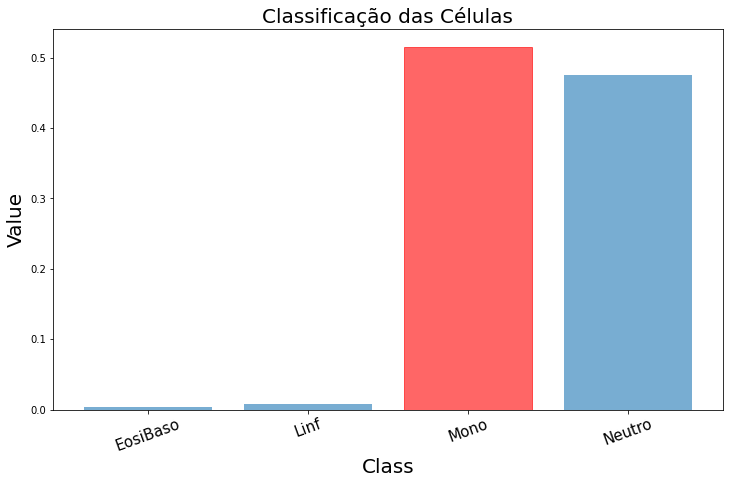

1/1 [==============================] - 0s 30ms/step

Scores shape        : (1, 4)
Scores values       : [8.4162917e-04 2.3154626e-04 3.9492920e-02 9.5943391e-01]
Scores sum          : 1.0
Score of prediction : 0.95943
Class index         : 3
Label               : Neutro
Time                : 0.07991


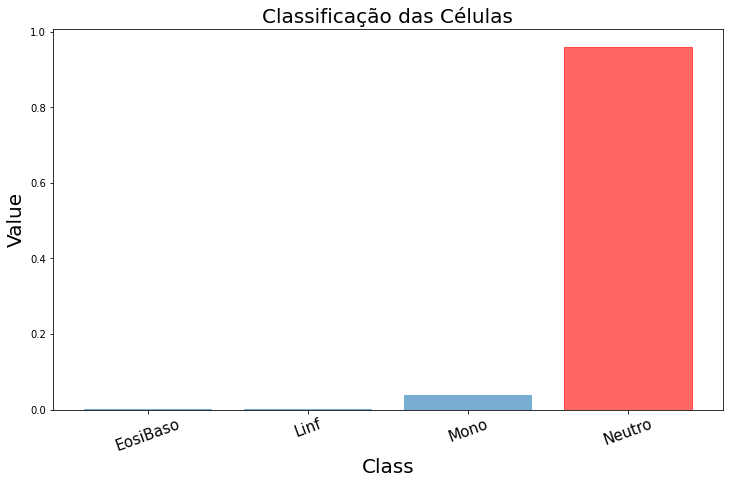

In [ ]:
%matplotlib inline

f = 0

for f in image:
    #  Setting default size of the plot
    plt.rcParams['figure.figsize'] = (12, 7)

    # Testing RGB model trained on dataset: dataset_custom_rgb_255_mean.hdf5
    # Input image is preprocessed in the same way
    # Measuring classification time
    start = timer()
    # scores = model.predict(image_custom_rgb_255_mean)
    # scores = model.predict(x_val)
    scores = model.predict(prepare(f)/255.0) # imagem normalizada
    end = timer()

    # Scores are given as 5 numbers of predictions for each class
    # Getting only one class with maximum value
    prediction = np.argmax(scores)

    # Check points
    # Showing scores shape and values
    # Printing class index, label and time
    print()
    print('Scores shape        :', scores.shape)
    print('Scores values       :', scores[0])
    print('Scores sum          :', scores[0].sum())
    print('Score of prediction : {0:.5f}'.format(scores[0][prediction])) # REVER
    print('Class index         :', prediction)
    print('Label               :', labels_custom[prediction]) # REVER
    print('Time                : {0:.5f}'.format(end - start))

    # Plotting bar chart with scores values
    bar_chart(scores[0],
              bar_title='Células',
              show_xticks=True,
              labels=labels_custom)